# Classification Project

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accurancy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [3]:
df = pd.read_csv("C:/Users/mona/Desktop/Advertising.csv")

**Check the head of ad_data**

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
col = ['Ad Topic Line', 'City', 'Timestamp','Country']
df.drop(columns = col, inplace = True)

In [6]:
df['Clicked on Ad'].unique()

array([0, 1], dtype=int64)

In [7]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


**Use info and describe() on ad_data**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [9]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Create a histogram of the Age**

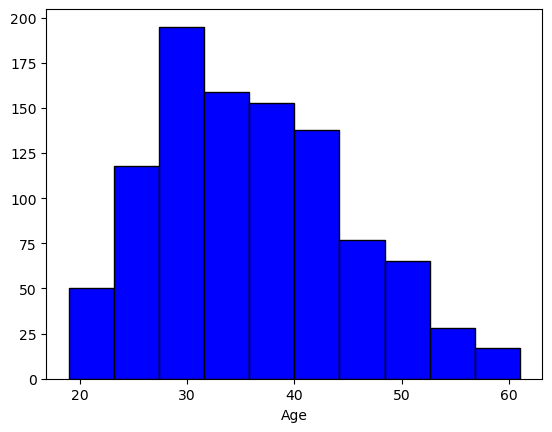

In [10]:
plt.hist(df['Age'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Age') 
plt.show()

**Create a jointplot showing Area Income versus Age.**

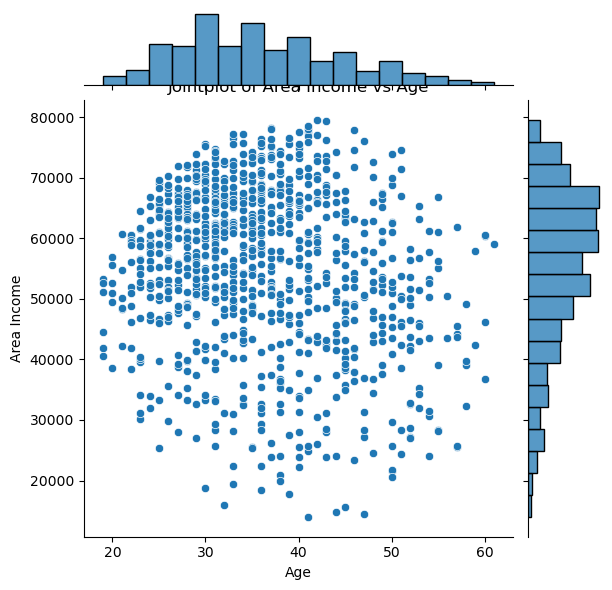

In [11]:
sns.jointplot(x='Age', y='Area Income', data=df, kind='scatter')
# Display jointplot 
plt.xlabel('Age') 
plt.ylabel('Area Income')
plt.title('Jointplot of Area Income vs Age')
plt.show()

**Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

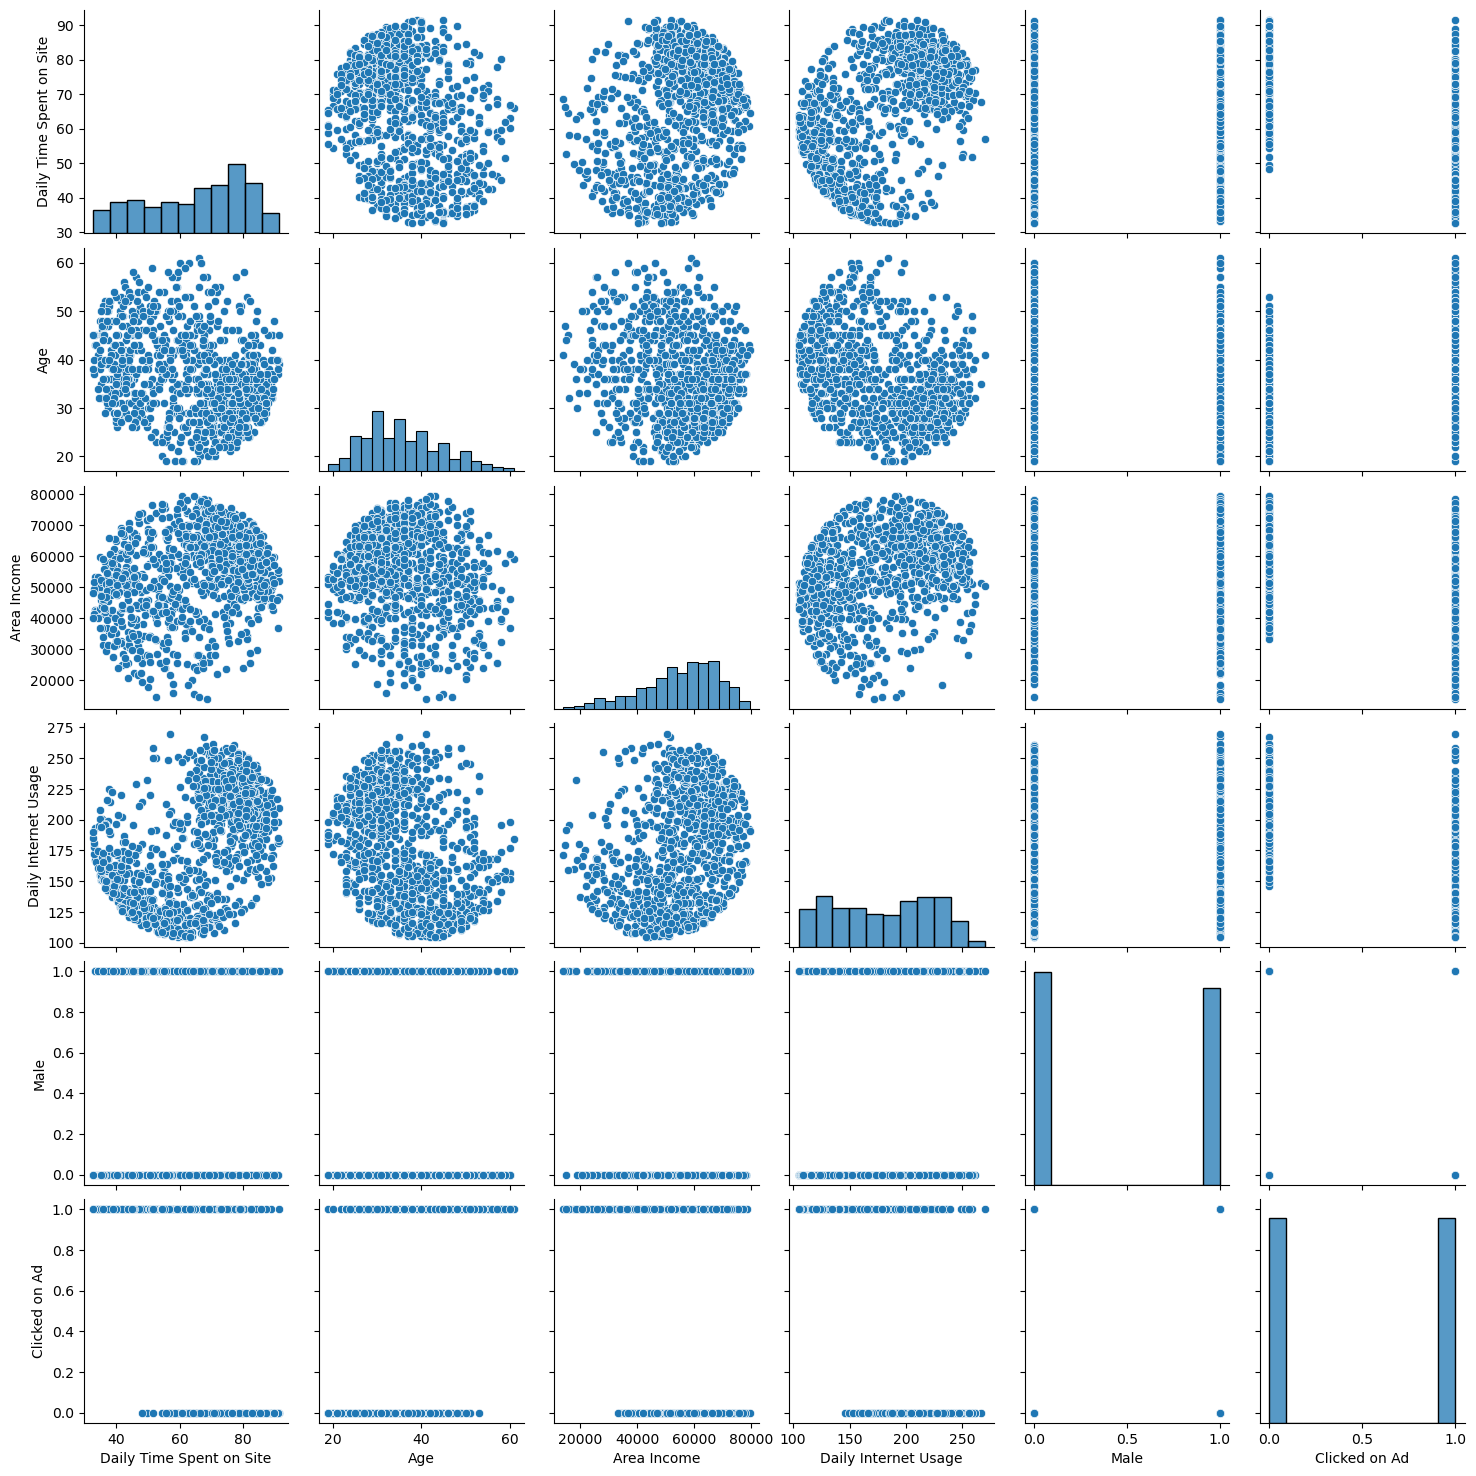

In [12]:
sns.pairplot(df)

Now it's time to do a train test split, and train our model!


You'll have the freedom here to choose columns that you want to train on!

**Split the data into training set and testing set using train_test_split**

In [222]:
x = df.drop(columns = ['Male'], axis = 1)


In [223]:
y = df['Male']

In [224]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 30)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
encoder = LabelEncoder()
df['Male'] = encoder.fit_transform(df['Male'])

**fit and predict a logistic regression model on the training set.**

In [227]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

**Print the classification Report and confusion matrix for logistic regression**

In [228]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[79, 30],
       [65, 26]], dtype=int64)

<Axes: >

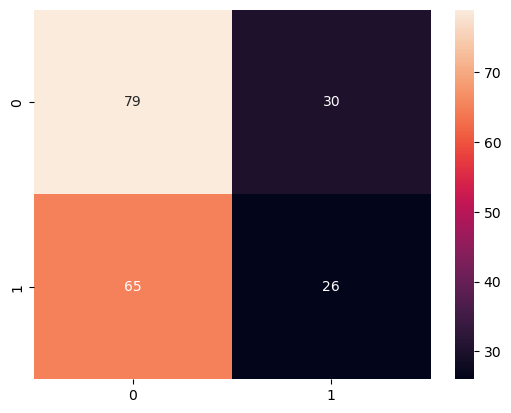

In [229]:
sns.heatmap(cm, annot=True)

In [230]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       109
           1       0.46      0.29      0.35        91

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.53      0.50       200



**fit and predict a KNN model on the training set.**

In [231]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [232]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [233]:
knn_pred = knn_model.predict(x_test)


**Print the classification Report and confusion matrix for KNN**

In [234]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       109
           1       0.46      0.29      0.35        91

    accuracy                           0.53       200
   macro avg       0.51      0.51      0.49       200
weighted avg       0.51      0.53      0.50       200



In [235]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[79, 30],
       [65, 26]], dtype=int64)

<Axes: >

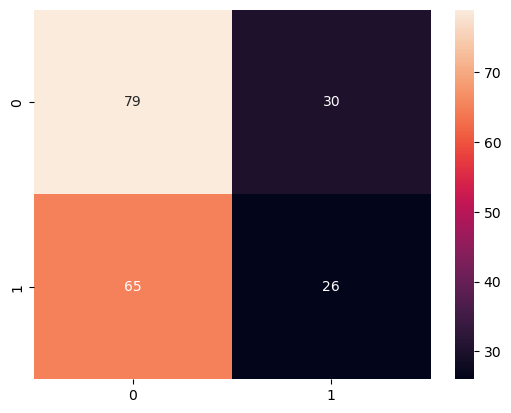

In [236]:
sns.heatmap(cm, annot=True)

**fit and predict a GaussianNB model on the training set.**

In [237]:
from sklearn.naive_bayes import GaussianNB

In [238]:
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

**Print the classification Report and confusion matrix for GaussianNB**

In [239]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.54      0.55       109
           1       0.48      0.51      0.49        91

    accuracy                           0.53       200
   macro avg       0.52      0.52      0.52       200
weighted avg       0.53      0.53      0.53       200



In [240]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[59, 50],
       [45, 46]], dtype=int64)

<Axes: >

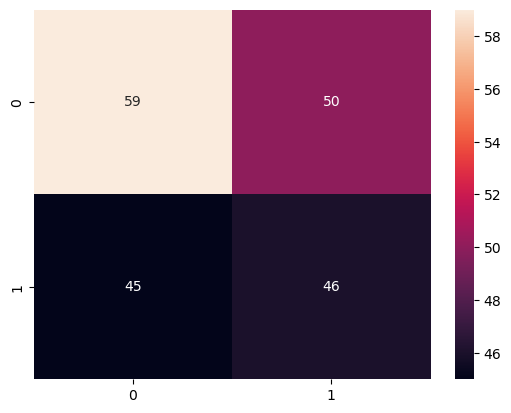

In [241]:
sns.heatmap(cm, annot=True)

## **HyperParameter Tuning**

**Choose the best model with the best performance to apply Grid Search to enhance the model performance**

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [244]:
model = GridSearchCV(lr_model, param_grid = param_grid, cv=5)
model.fit(x_train, y_train)

C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\mona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [245]:
best_params = model.best_params_
print("Best hyperparameters:", best_params)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}


In [246]:
best_score = model.best_score_
print("Best score:", best_score)

Best score: 0.5125
